In [7]:
import pandas as pd
import sys
import os
import json

In [8]:
RUTA_CARPETA = "Datos/Originales/Datos looks/"  
def cargar_csv_inteligente(nombre_archivo):
    ruta_completa = os.path.join(RUTA_CARPETA, nombre_archivo)
    print(f"Leemos: {nombre_archivo} ...", end=" ")  
    df = pd.read_csv(ruta_completa, sep=None, engine='python')
    if df.shape[1] < 2:
        df = pd.read_csv(ruta_completa, sep=';')   
    df.columns = df.columns.str.strip().str.replace('"', '').str.replace("'", "")
    print(f"✅ OK ({df.shape[0]} filas, {df.shape[1]} cols)")
    return df

df_product = cargar_csv_inteligente('product_2.csv')
df_variant = cargar_csv_inteligente('product_variant.csv')
df_color   = cargar_csv_inteligente('color.csv')
df_size    = cargar_csv_inteligente('size.csv')
df_brand   = cargar_csv_inteligente('brand.csv')
df_pfv     = cargar_csv_inteligente('product_feature_value.csv') 
df_fv      = cargar_csv_inteligente('feature_value.csv')         
df_fvf     = cargar_csv_inteligente('feature_value_family.csv')  
df_feat    = cargar_csv_inteligente('feature.csv')              

# --- 3. PREPARACIÓN DE VARIABLES (RENOMBRADO) ---
if 'id' in df_product.columns: df_product.rename(columns={'id': 'product_id'}, inplace=True)
if 'id' in df_variant.columns: df_variant.rename(columns={'id': 'variant_id'}, inplace=True)
if 'id' in df_color.columns: df_color.rename(columns={'id': 'color_id_ref', 'title': 'color_name'}, inplace=True)
if 'id' in df_size.columns:  df_size.rename(columns={'id': 'size_id_ref', 'title': 'size_name'}, inplace=True)
if 'id' in df_brand.columns: df_brand.rename(columns={'id': 'brand_id_ref', 'title': 'brand_name'}, inplace=True)
if 'id' in df_pfv.columns:   df_pfv.rename(columns={'id': 'pfv_id'}, inplace=True)
if 'id' in df_fv.columns:    df_fv.rename(columns={'id': 'fv_id_ref', 'value': 'feature_value_name'}, inplace=True)
if 'id' in df_feat.columns:  df_feat.rename(columns={'id': 'feat_id_ref', 'title': 'feature_name'}, inplace=True)
df_main = pd.merge(df_product, df_variant, on='product_id', how='left')
df_main['color_id'] = df_main['color_id'].astype(str).str.replace('.0', '', regex=False)
df_color['color_id_ref'] = df_color['color_id_ref'].astype(str)
df_main['size_id'] = df_main['size_id'].astype(str).str.replace('.0', '', regex=False)
df_size['size_id_ref'] = df_size['size_id_ref'].astype(str)
df_main = pd.merge(df_main, df_color, left_on='color_id', right_on='color_id_ref', how='left')
df_main = pd.merge(df_main, df_size, left_on='size_id', right_on='size_id_ref', how='left')
df_main = pd.merge(df_main, df_brand, left_on='brand_id', right_on='brand_id_ref', how='left')
df_feats = pd.merge(df_main, df_pfv, on='product_id', how='left')
df_feats = pd.merge(df_feats, df_fv, left_on='feature_value_id', right_on='fv_id_ref', how='left')
df_feats = pd.merge(df_feats, df_feat, left_on='feature_id', right_on='feat_id_ref', how='left')
df_final = pd.merge(df_feats, df_fvf, left_on='fv_id_ref', right_on='feature_value_id', how='left', suffixes=('', '_fam'))
cols_borrar = [c for c in df_final.columns if '_ref' in c or 'Unnamed' in c]
df_final.drop(columns=cols_borrar, inplace=True, errors='ignore')
print(f"DataFrame final 'df_final': {df_final.shape[0]} filas y {df_final.shape[1]} columnas.")
display(df_final.head(3))

Leemos: product_2.csv ... ✅ OK (2932 filas, 7 cols)
Leemos: product_variant.csv ... ✅ OK (65226 filas, 9 cols)
Leemos: color.csv ... ✅ OK (54 filas, 5 cols)
Leemos: size.csv ... ✅ OK (126 filas, 6 cols)
Leemos: brand.csv ... ✅ OK (163 filas, 4 cols)
Leemos: product_feature_value.csv ... ✅ OK (75347 filas, 3 cols)
Leemos: feature_value.csv ... ✅ OK (2266 filas, 3 cols)
Leemos: feature_value_family.csv ... ✅ OK (34633 filas, 2 cols)
Leemos: feature.csv ... ✅ OK (61 filas, 5 cols)
DataFrame final 'df_final': 14286029 filas y 36 columnas.


,product_id,brand_id,family_id,group,legacy_id_x,title,variant_id,barcode,color_id,legacy_id_y,...,pfv_id,feature_value_id,feature_value_name,feature_id,name,type,multiple,unit,family_id_fam,feature_value_id_fam
0,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,fbc2f719-e038-4243-892c-7bd2ca6e80b5,740661,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,...,17180364-12d1-423b-b9f4-ed7d121910d2,b5ce1fed-4c38-4920-90b5-42e46f971e97,cardigan,0ccb5374-db8c-4dbb-afae-6b2652af170d,top_type,STRING,f,\N,141f32d6-a5af-49bf-b019-fd28354977f1,b5ce1fed-4c38-4920-90b5-42e46f971e97
1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,fbc2f719-e038-4243-892c-7bd2ca6e80b5,740661,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,...,17180364-12d1-423b-b9f4-ed7d121910d2,b5ce1fed-4c38-4920-90b5-42e46f971e97,cardigan,0ccb5374-db8c-4dbb-afae-6b2652af170d,top_type,STRING,f,\N,1b93b30c-833f-45a8-ba69-c21d2e7f4824,b5ce1fed-4c38-4920-90b5-42e46f971e97
2,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,fbc2f719-e038-4243-892c-7bd2ca6e80b5,740661,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,...,17180364-12d1-423b-b9f4-ed7d121910d2,b5ce1fed-4c38-4920-90b5-42e46f971e97,cardigan,0ccb5374-db8c-4dbb-afae-6b2652af170d,top_type,STRING,f,\N,3087da56-5a27-4e58-aea7-1555c640f232,b5ce1fed-4c38-4920-90b5-42e46f971e97


In [9]:
df_final["tipo_prenda"] = df_final["title"].apply(
    lambda x: x.split()[1].lower() if len(x.split()) >= 2 else None)
dffinal = df_final[['product_id','title','season','name_x','lookiero','name_y','feature_value_name','name','tipo_prenda']]
dffinal = dffinal.drop_duplicates()
dffinal['lookiero'] = dffinal['lookiero'].apply(lambda x: json.loads(x.replace("'", "\""))['size'])
dffinal = dffinal.rename(columns={'product_id': 'ID','title': 'Titulo',
    'season': 'Temporada','name_x': 'Color','lookiero': 'Lookiero','name_y': 'Marca', 
    'feature_value_name': 'Caracteristica','name': 'Caracteristica1'})
df_final=df_final[df_final['tipo_prenda']!='l']
nivel1 = ["pant", "jeans", "jean", "skirt", "falda","short", "shorts", "dress", "jumpsuit","playsuit"]
nivel2 = ["cardigan", "sweater", "shirt", "tshirt", "t-shirt", "top",  "sweatshirt", "pullover","t-shit"]
nivel3=["jacket", "jakect", "jackect", "scarf","parka","coat","bag","foulard","trench","fular"]
def clasificar_prenda(palabra):
    if palabra in nivel1:
        return "1"
    elif palabra in nivel2:
        return "2"
    else:
        return "3"
dffinal["nivel"] = dffinal["tipo_prenda"].apply(clasificar_prenda)

In [10]:
target_cols = ['Adventuruous', 'print', 'style', 'fit', 
    'application', 'Composition', 'alerts']
df_filtered = dffinal[dffinal['Caracteristica1'].isin(target_cols)].copy()
df_filtered = df_filtered.drop_duplicates(subset=['Titulo', 'Caracteristica1', 'Caracteristica'])
df_filtered['contador'] = df_filtered.groupby(['Titulo', 'Caracteristica1']).cumcount() + 1
df_filtered['nueva_columna'] = df_filtered['Caracteristica1'] + df_filtered['contador'].astype(str)
df_pivot = df_filtered.pivot(index='Titulo', columns='nueva_columna', values='Caracteristica')
df_final = df_pivot.fillna('').reset_index()
df_final = df_final.reindex(sorted(df_final.columns), axis=1)
df_final

nueva_columna,Titulo,alerts1,alerts2,alerts3,alerts4,application1,application2,application3,application4,fit1,fit2,print1,print2,print3,style1,style2,style3
0,Abba Top miniprint,,,,,freetime,,,,straight,,floral,,,boho,classic,
1,Abba Top print,,,,,freetime,,,,straight,,floral,,,boho,classic,
2,Abbey Sweater embroidered,,,,,work,freetime,,,straight,,smooth,,,classic,,
3,Abby Dress caribbean,breastfeeding,,,,work,freetime,,,tight,,printed,,,classic,street,
4,Abelone Playsuit miniprint,,,,,freetime,,,,loose,,sheets,miniprint,,boho,classic,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,Zinka Dress summer,,,,,freetime,,,,straight,,sheets,ethnic,,boho,,
2901,Zinka Shirt flower,breastfeeding,,,,work,freetime,,,loose,,floral,,,classic,boho,
2902,Zipe Sweater season,special_size,,,,freetime,,,,oversize,,smooth,,,casual,street,
2903,Zoe Cardigan long,,,,,freetime,work,,,oversize,,smooth,,,boho,casual,


In [11]:
target_cols = ['Adventuruous', 'print', 'style', 'fit', 'application', 'Composition', 'alerts']
df_filtered = dffinal[dffinal['Caracteristica1'].isin(target_cols)].copy()
df_filtered = df_filtered.drop_duplicates(subset=['Titulo', 'Caracteristica1', 'Caracteristica'])
df_filtered['contador'] = df_filtered.groupby(['Titulo', 'Caracteristica1']).cumcount() + 1
df_filtered['nueva_columna'] = df_filtered['Caracteristica1'] + df_filtered['contador'].astype(str)
df_pivot = df_filtered.pivot(index='Titulo', columns='nueva_columna', values='Caracteristica')
df_pivot = df_pivot.fillna('')
dffinal = dffinal.merge(df_pivot, on='Titulo', how='left')
new_cols = df_pivot.columns.tolist() 
dffinal[new_cols] = dffinal[new_cols].fillna('')
dffinal.to_csv('Datos/Transformados/df_unificado.csv',index=False)

In [12]:
dffinal

,ID,Titulo,Temporada,Color,Lookiero,Marca,Caracteristica,Caracteristica1,tipo_prenda,nivel,...,application3,application4,fit1,fit2,print1,print2,print3,style1,style2,style3
0,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,black,XL,BRAND119,cardigan,top_type,cardigan,2,...,,,straight,,smooth,,,boho,classic,
1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,black,XL,BRAND119,ribbed,finishing,cardigan,2,...,,,straight,,smooth,,,boho,classic,
2,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,black,XL,BRAND119,two,adventurous,cardigan,2,...,,,straight,,smooth,,,boho,classic,
3,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,black,XL,BRAND119,without_closing,closing,cardigan,2,...,,,straight,,smooth,,,boho,classic,
4,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,black,XL,BRAND119,cold_season,weather,cardigan,2,...,,,straight,,smooth,,,boho,classic,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620703,98c51c8b-c467-4025-9517-806334bc8680,Sculp Jeans skinny,7,blue_dark,M,BRAND54,skinny,down_part_type,jeans,1,...,,,tight,,smooth,,,street,boho,
620704,98c51c8b-c467-4025-9517-806334bc8680,Sculp Jeans skinny,7,blue_dark,M,BRAND54,cotton,composition,jeans,1,...,,,tight,,smooth,,,street,boho,
620705,98c51c8b-c467-4025-9517-806334bc8680,Sculp Jeans skinny,7,blue_dark,M,BRAND54,elastane,composition,jeans,1,...,,,tight,,smooth,,,street,boho,
620706,98c51c8b-c467-4025-9517-806334bc8680,Sculp Jeans skinny,7,blue_dark,M,BRAND54,smooth,print,jeans,1,...,,,tight,,smooth,,,street,boho,


In [13]:
dffinal['Color'].unique()

array(['black', 'beige', 'rust', 'red', 'yellow', 'ecru', 'blue_dark',
       'green_dark', 'camel', 'gray_light', 'khaki', 'brown', 'indigo',
       'white', 'green', 'grey_dark', 'mustand', 'pink', 'blue_light',
       'blue', 'orange', 'crimson', 'salmon', 'green_light', 'garnet',
       'grey_blue', 'aubergine', 'blue_petrol', 'grey', 'brown_light',
       'strawberry', 'fuchsia', 'pale_pink', 'taupe', 'yellow_light',
       'coral', 'lilac', 'blue_turquoise', 'nude', 'blue_klein', 'silver',
       'brick', 'purple', 'lemon', 'ochre', 'sand', 'mint', 'jade',
       'gold', 'pistachio', 'baby_blue', 'mandarine', 'wine'],
      dtype=object)

In [14]:
color_hex = {
    'black':'#000000','beige':'#F5F5DC','rust':'#B7410E','red':'#FF0000','yellow':'#FFFF00',
    'ecru':'#C2B280','blue_dark':'#00008B','green_dark':'#006400','camel':'#C19A6B',
    'gray_light':'#D3D3D3','khaki':'#C3B091','brown':'#8B4513','indigo':'#4B0082',
    'white':'#FFFFFF','green':'#008000','grey_dark':'#505050','mustand':'#E1AD01',
    'pink':'#FFC0CB','blue_light':'#ADD8E6','blue':'#0000FF','orange':'#FFA500',
    'crimson':'#DC143C','salmon':'#FA8072','green_light':'#90EE90','garnet':'#733635',
    'grey_blue':'#6699CC','aubergine':'#580F41','blue_petrol':'#006C84','grey':'#808080',
    'brown_light':'#A0522D','strawberry':'#FC5A8D','fuchsia':'#FF00FF','pale_pink':'#FADADD',
    'taupe':'#483C32','yellow_light':'#FFFFE0','coral':'#FF7F50','lilac':'#C8A2C8',
    'blue_turquoise':'#30D5C8','nude':'#E3BC9A','blue_klein':'#002FA7','silver':'#C0C0C0',
    'brick':'#8B0000','purple':'#800080','lemon':'#FFF44F','ochre':'#CC7722',
    'sand':'#C2B280','mint':'#98FF98','jade':'#00A86B','gold':'#FFD700',
    'pistachio':'#93C572','baby_blue':'#89CFF0','mandarine':'#FF8C42','wine':'#722F37'
}


In [15]:
import colorsys
import matplotlib.colors as mcolors

def hue(hex_color):
    r, g, b = mcolors.to_rgb(hex_color)
    h, _, _ = colorsys.rgb_to_hsv(r, g, b)
    return h

ordenados = dict(sorted(color_hex.items(), key=lambda x: hue(x[1])))


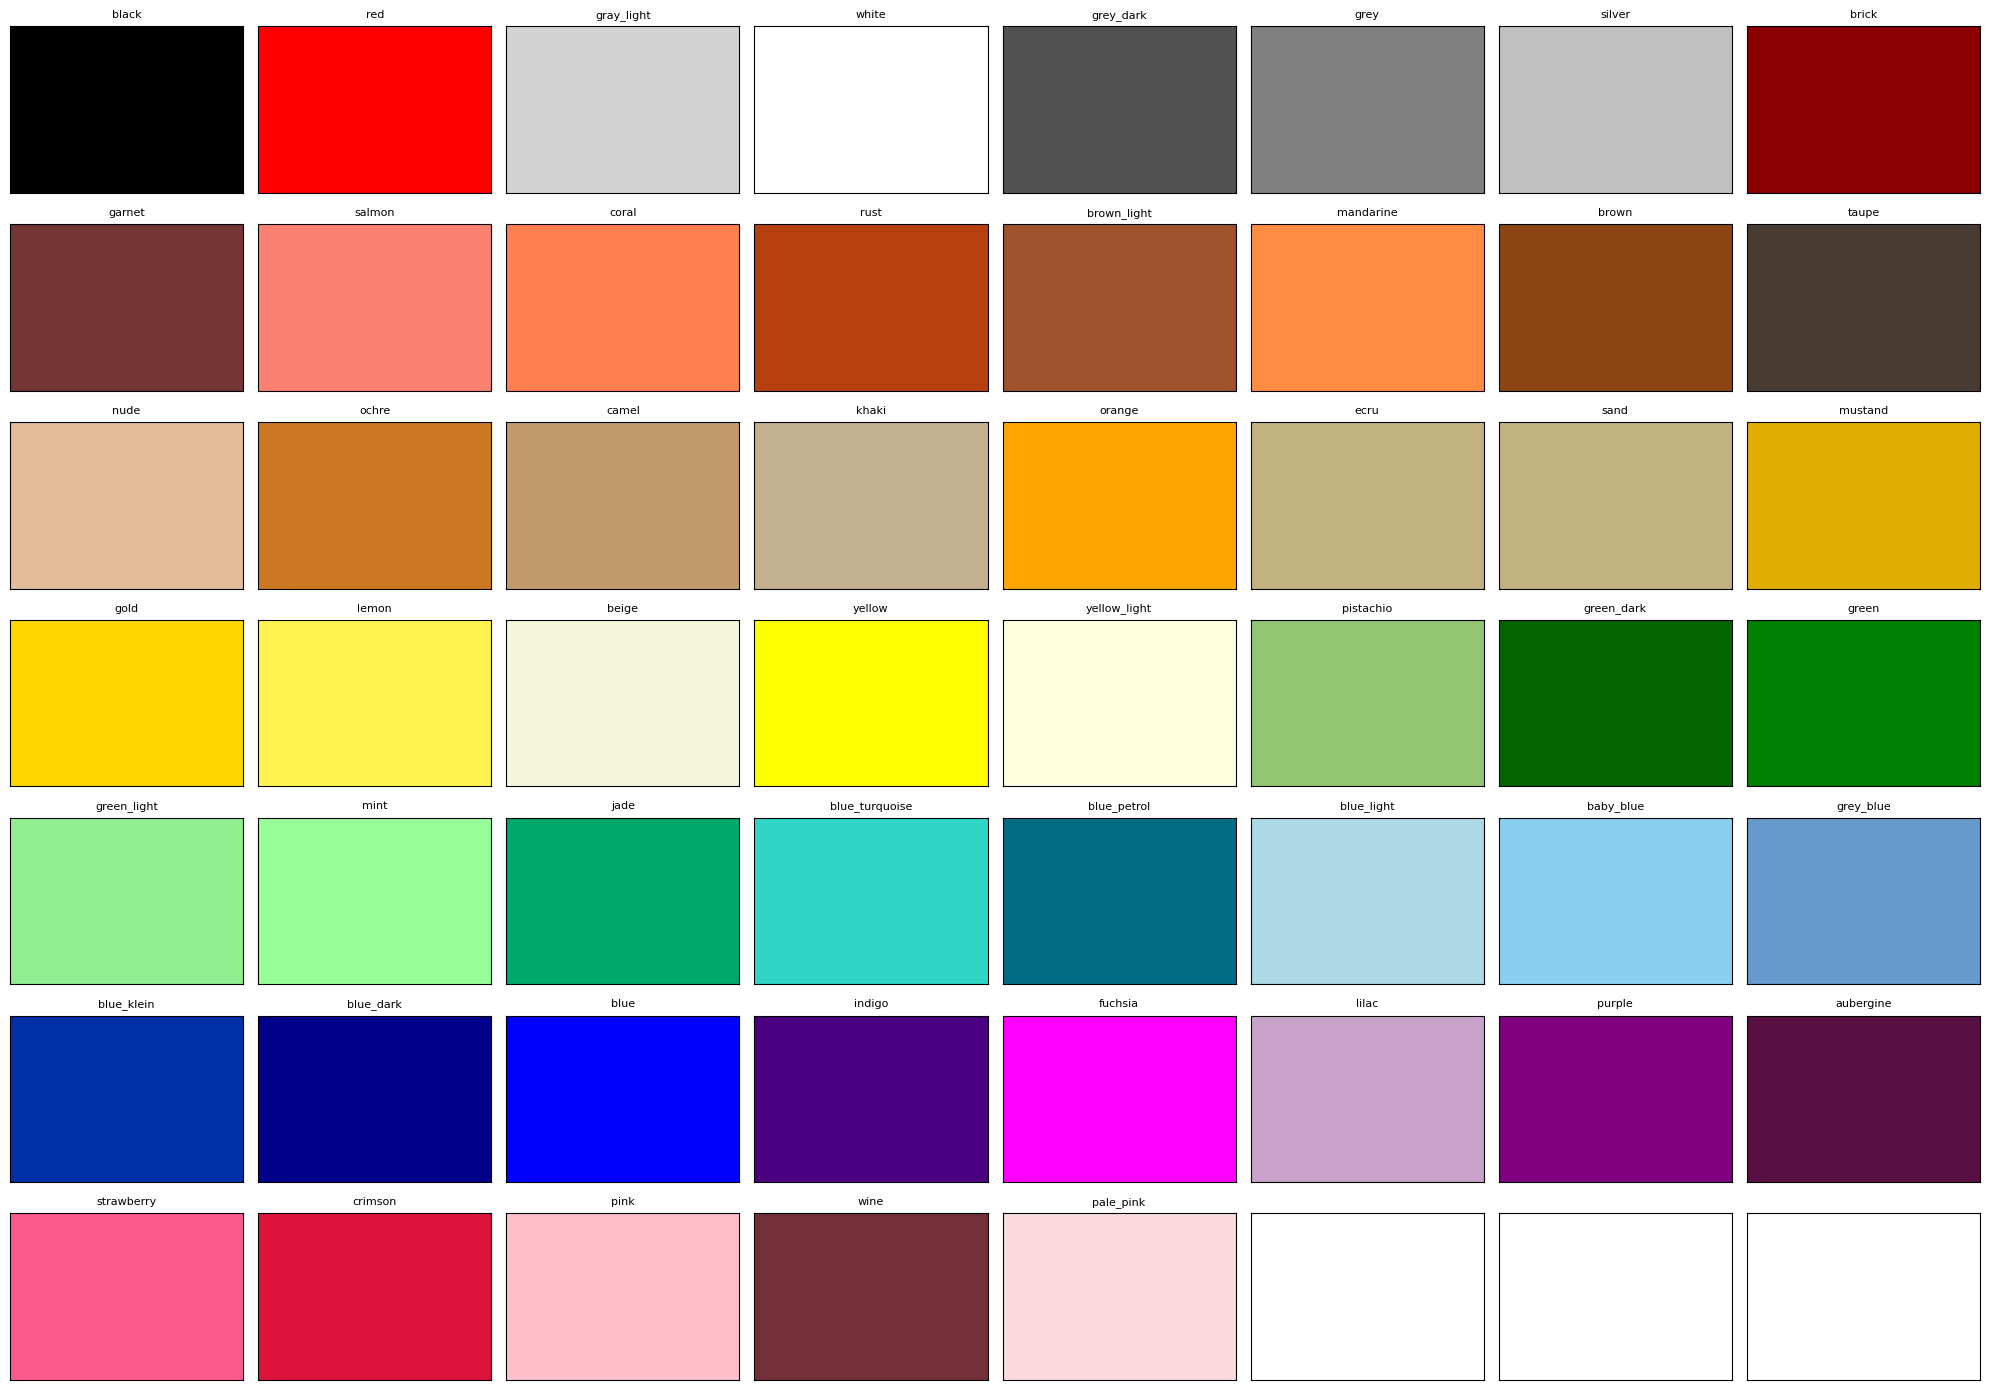

In [19]:
import matplotlib.pyplot as plt
import math

colors = list(ordenados.keys())
hex_values = list(ordenados.values())

n = len(colors)
cols = 8
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows*2))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < n:
        ax.set_facecolor(hex_values[i])
        ax.set_title(colors[i], fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()
